<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-данных-и-предобработка" data-toc-modified-id="Изучение-данных-и-предобработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных и предобработка</a></span></li><li><span><a href="#Расчеты" data-toc-modified-id="Расчеты-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчеты</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Распределение-по-платформам,-жанрам-и-продажам" data-toc-modified-id="Распределение-по-платформам,-жанрам-и-продажам-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Распределение по платформам, жанрам и продажам</a></span></li><li><span><a href="#Портрет-пользователя-по-регионам" data-toc-modified-id="Портрет-пользователя-по-регионам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Портрет пользователя по регионам</a></span></li><li><span><a href="#Гипотезы" data-toc-modified-id="Гипотезы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Гипотезы</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></li></ul></div>

# Изучение рынка видеоигр

## Описание проекта

Интернет-магазину, который продаёт по всему миру компьютерные игры, необходимо спрогнозировать спрос на игры в следующем году, чтобы "настроить" свою рекламную кампанию. Для этого нужно изучить и проанализировать рынок видеоигр на исторических данных.

Из открытых источников доступны данные о продажах игр до 2016 года включительно, а также оценки пользователей и экспертов, жанры и платформы (например, Xbox, PlayStation, PC). Данные за 2016 год могут быть неполными.

<b>Ход исследования</b>:
- загрузить и предобработать данные, заполнить пропуски, где возможно и имеет смысл;
- найти средний период "жизни" платформ и, исходя из этого, определить актуальный период, для которого буду делать дальнейшие расчеты;
- провести необходимые расчеты (например, найти сумму продаж игр по всему миру, исходя из региональных данных, или составить топ-5 популярных платформ и жанров по регионам);
- проанализировать и сравнить данные;
- проверить гипотезы.

<b>Описание данных</b>:
- Name — название игры;

- Platform — платформа;

- Year_of_Release — год выпуска игры на платформе;

- Genre — жанр игры;

- NA_sales — продажи в Северной Америке (млн копий);

- EU_sales — продажи в Европе (млн копий);

- JP_sales — продажи в Японии (млн копий);

- Other_sales — продажи в других странах (млн копий);

- Critic_Score — оценка критиков (100-балльная шкала);

- User_Score — оценка пользователей (10-балльная шкала);

- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board), которая определяет возрастную категорию видеоигр.

Расфшифровка рейтингов от ESRB:

- EC — игры для детей от 3 лет, равивающие игры;
- K-A (устаревшее обозначение) или E — игры для детей от 6 лет;
- E10+ — игры для детей от 10 лет (категория введена с 2005 года);
- T — игры для подростков от 13 лет;
- M — игры для подростков от 17 лет;
- AO — Только взрослые игры, 18+;
- RP (англ. rating pending) — рейтинг ожидается (обычно используется при рекламе предстоящих игр и на демо-версиях).

## Изучение данных и предобработка

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games = games.set_index('name')
games

KeyError: "None of ['name'] are in the columns"

In [ ]:
games.index

<div style="border:solid green 2px; padding: 20px">
Приведем названия всех столбцов к нижнему регистру в соответствии с рекомендуемой стилистикой написания кода.

In [6]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div style="border:solid green 2px; padding: 20px">
Проверим на дубликаты.

In [7]:
games.loc[games.duplicated()].sum()

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

<div style="border:solid green 2px; padding: 20px">
Зачение tbd (англ. to be decided) в столбце пользовательского рейтинга означает, что пользователь еще не определился со своей оценкой игры, поэтому заменим это значение на NaN.

In [9]:
games.loc[games['user_score'] == 'tbd'] = np.nan
games['user_score'].value_counts(dropna=False)

NaN    9125
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.3       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

<div style="border:solid green 2px; padding: 20px">
Обнаружив, что большинство игр, содержащих в названии год, были по факту выпущены годом ранее, заполним некоторые пропуски в столбце 'year_of_release'.

In [10]:
code = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

for yr, year in zip(code, year):
    games.loc[(games['name'].str.contains(yr)) & (games['year_of_release'].isna()), 'year_of_release'] = year

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16468 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style="border:solid green 2px; padding: 20px">
Заменим тип данных в столбцах 'year_of_release' (чтобы избавиться от некрасивого .0) и 'user_score' (для дальнейших расчетов).

In [12]:
games = games.astype({'year_of_release': 'Int16', 'user_score': float})
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16468 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int16(1), float64(6), object(4)
memory usage: 1.3+ MB


In [13]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

<div style="border:solid green 2px; padding: 20px">
Зная, что устаревший рейтинг "K-A" соответствует рейтингу "E", заменим первый на второй.

In [14]:
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'
games['rating'].value_counts()

E       3993
T       2961
M       1563
E10+    1420
EC         8
RP         3
AO         1
Name: rating, dtype: int64

## Расчеты

<div style="border:solid green 2px; padding: 20px">
Расчитаем общие продажи для каждой игры и платформы.

In [15]:
games['total_sales'] =  games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


<div style="border:solid green 2px; padding: 20px">
Глядя на топ-20 самых продаваемых игр, можно заметить, что 7 из них — это игры для консоли Wii, причем три из них — в пятерке лучших. Это можно объяснить инновационностью платформы для своего времени, однако к настоящему времени она уже неактуальна. </div>

## Анализ

### Распределение по платформам, жанрам и продажам

<div style="border:solid green 2px; padding: 20px">
Составим график количества выпущенных игр по годам за все время. Пик приходится на период 2006-2011 гг.

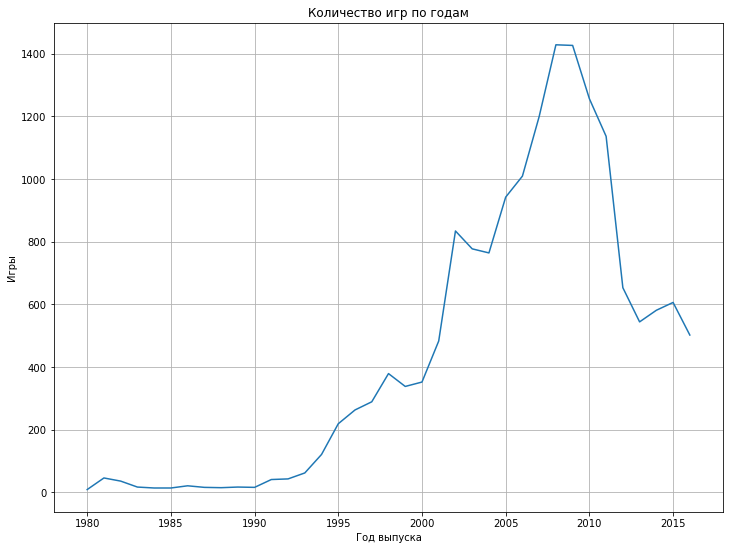

In [16]:
yr_sorted = games.groupby('year_of_release')['year_of_release'].count()
yr_sorted.plot(title='Количеcтво игр по годам', grid=True, ylabel='Игры',
               xlabel='Год выпуска', xlim=(1978, 2018), figsize=(12,9))
plt.show()

<div style="border:solid green 2px; padding: 20px">
Рассчитаем доходность платформ за все время.

In [17]:
platform_sorted = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sorted

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

<div style="border:solid green 2px; padding: 20px">
Построим графики продаж по платформам и годам для десяти самых прибыльных платформ.

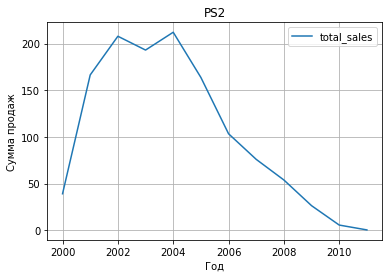

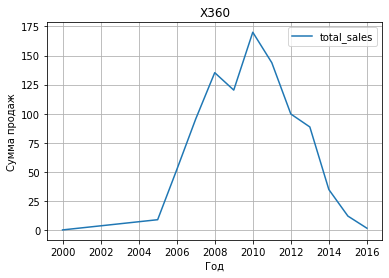

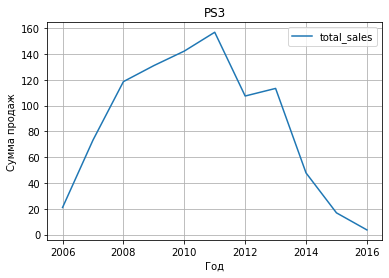

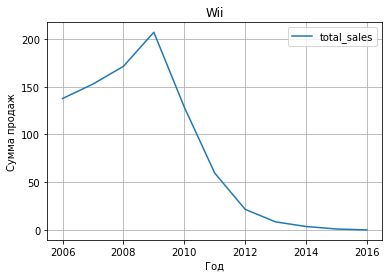

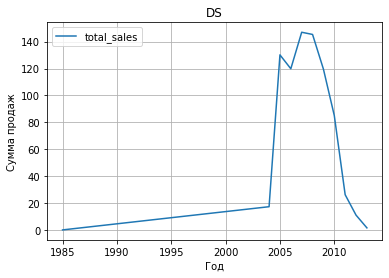

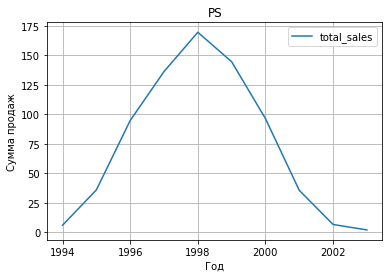

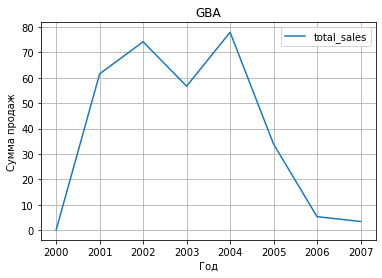

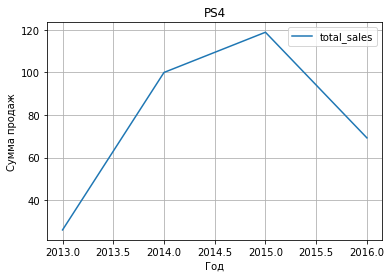

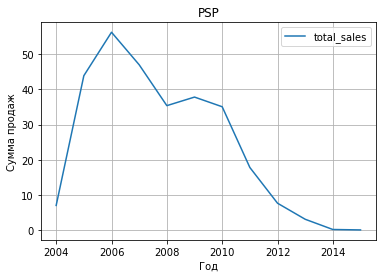

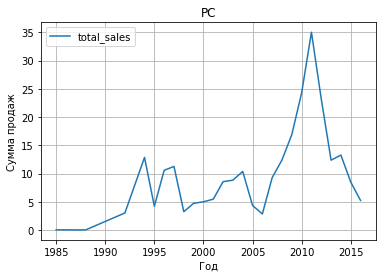

In [18]:
for i in platform_sorted.index[0:10]:
    platform = games.loc[games['platform'] == i]
    platform_grouped_yr = platform.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
    platform_grouped_yr.plot(x='year_of_release', y='total_sales', title=i, grid=True, ylabel='Сумма продаж', xlabel='Год')

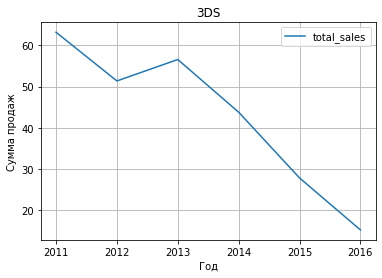

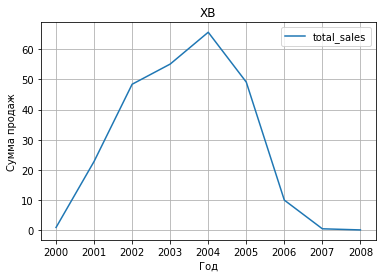

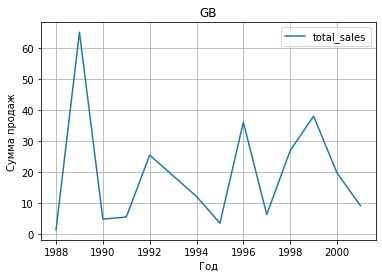

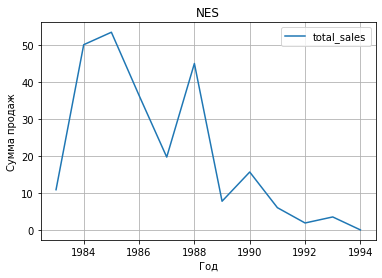

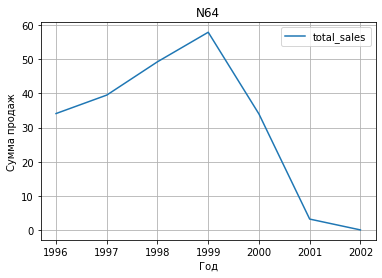

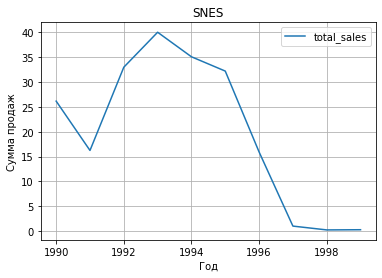

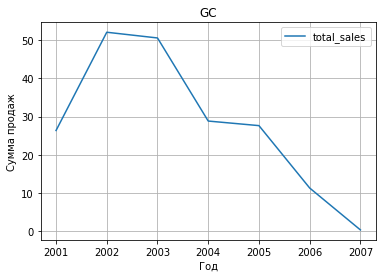

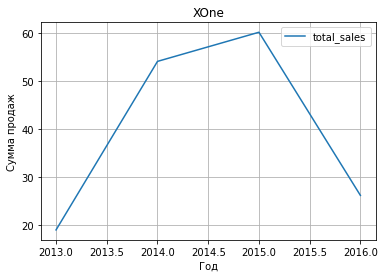

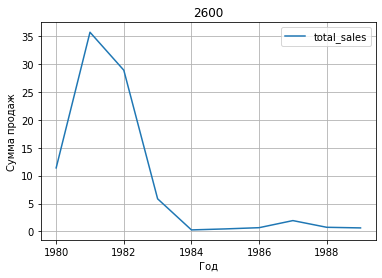

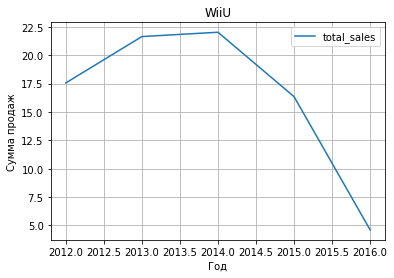

In [19]:
for i in platform_sorted.index[10:20]:
    platform = games.loc[games['platform'] == i]
    platform_grouped_yr = platform.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
    platform_grouped_yr.plot(x='year_of_release', y='total_sales', title=i, grid=True, ylabel='Сумма продаж', xlabel='Год')

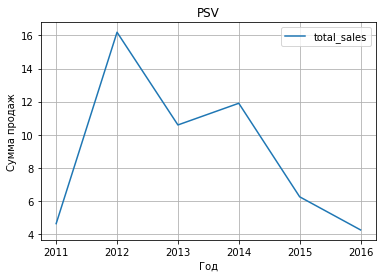

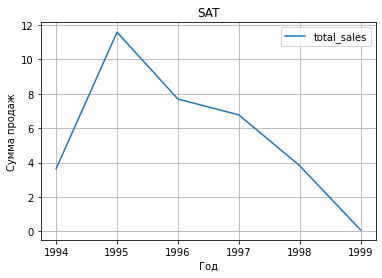

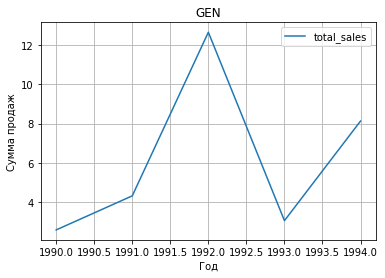

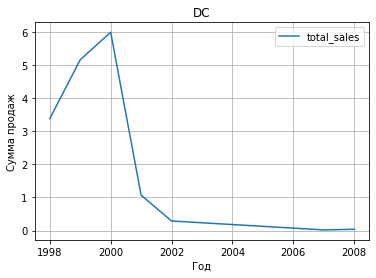

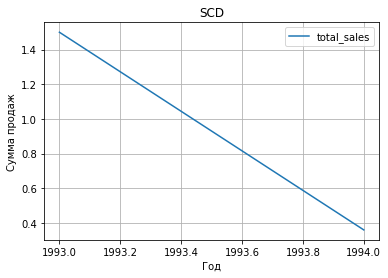

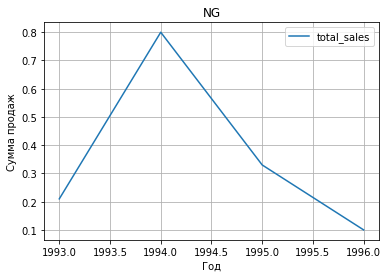

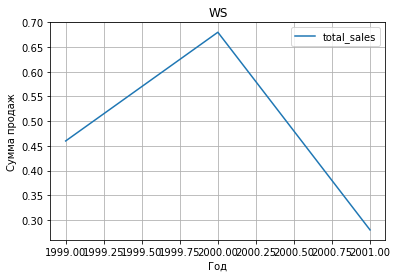

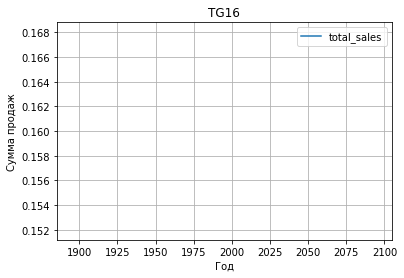

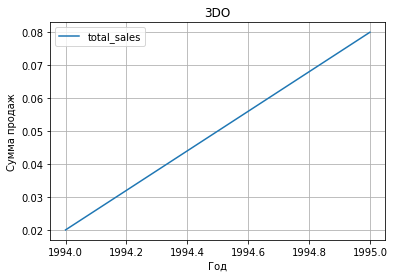

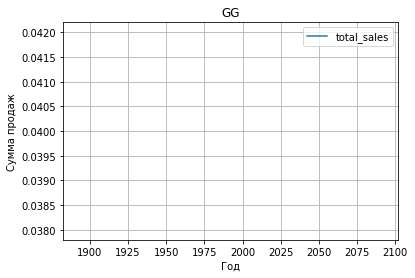

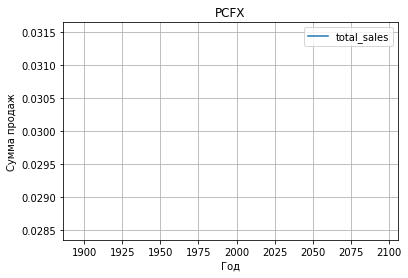

In [20]:
for i in platform_sorted.index[20:]:
    platform = games.loc[games['platform'] == i]
    platform_grouped_yr = platform.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
    platform_grouped_yr.plot(x='year_of_release', y='total_sales', title=i, grid=True, ylabel='Сумма продаж', xlabel='Год')

<div style="border:solid green 2px; padding: 20px">
Из графиков можно сдедать вывод, что средняя активная "жизнь" платформы, если судить по продажам, — от 3 до 5 лет, поэтому актуальным периодом будем считать период в 5 лет. В дальнейшем изучать будем именно его.

Учитывая, что данные за 2016 год могут быть неполными, самой перспективной платформой представляется PS4, так как у нее в 2015 году была восходящая динамика доходности, а пик ее "жизни", можно сказать, начался в 2014 году. Значит, она будет актуальной еще 2-3 года.

<div style="border:solid green 2px; padding: 20px">
Для платформ, представленных на рынке в актуальном периоде, построим графики разброса продаж.

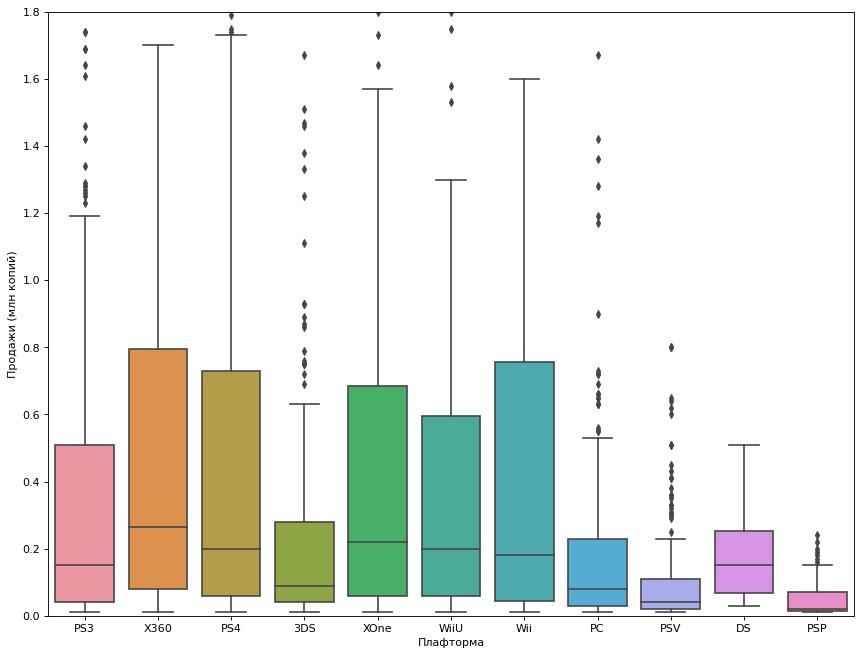

In [18]:
games_relevant = games.loc[games['year_of_release'] >= 2013]
plt.figure(figsize=(13,10), dpi= 80)
plt.ylim(0,1.8)
sns.boxplot(x='platform', y='total_sales', data=games_relevant, notch=False)
plt.ylabel('Продажи (млн копий)')
plt.xlabel('Плафторма')
plt.show()

<div style="border:solid green 2px; padding: 20px">
Из графиков видно, что наибольшие показатели медианы и третьего квантиля у платформ X360, PS4, XOne, Wii и WiiU.  </div>

<div style="border:solid green 2px; padding: 20px">
Изучимм, как влияют на продажи внутри одной платформы отзывы пользователей и критиков. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
    
Рассмотрим PS4, как самую прибыльную в актуальном периоде.

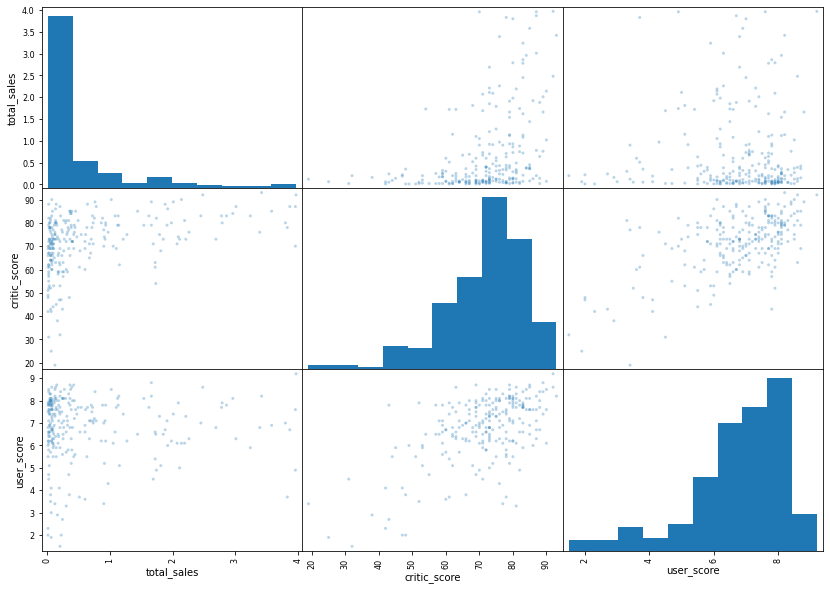

In [20]:
ps4 = games_relevant.loc[games_relevant['platform'] == 'PS4']
ps4 = ps4.loc[ps4['total_sales'] < 4]
ps4 = ps4[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(ps4, figsize=(14,10), alpha=0.3)
plt.show()

<div style="border:solid green 2px; padding: 20px">
Исходя из графика, нельзя сказать, что есть взаимосвязь между уровнем продаж игр и оценкой критиков и пользователей. Это подтверждает и тепловая карта.

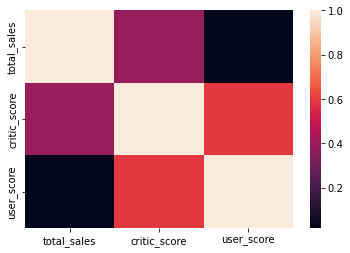

In [21]:
sns.heatmap(ps4.corr())
plt.show()

<div style="border:solid green 2px; padding: 20px">
Для других платформ картина схожая.

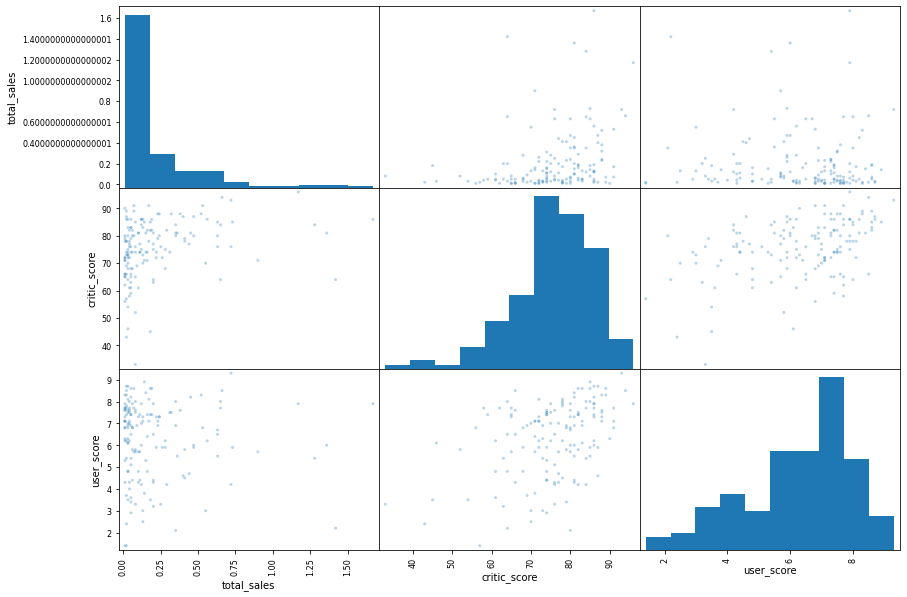

In [22]:
pc = games_relevant.loc[games_relevant['platform'] == 'PC']
pc = pc.loc[pc['total_sales'] < 3]
pc = pc[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(pc, figsize=(14,10), alpha=0.3)
plt.show()

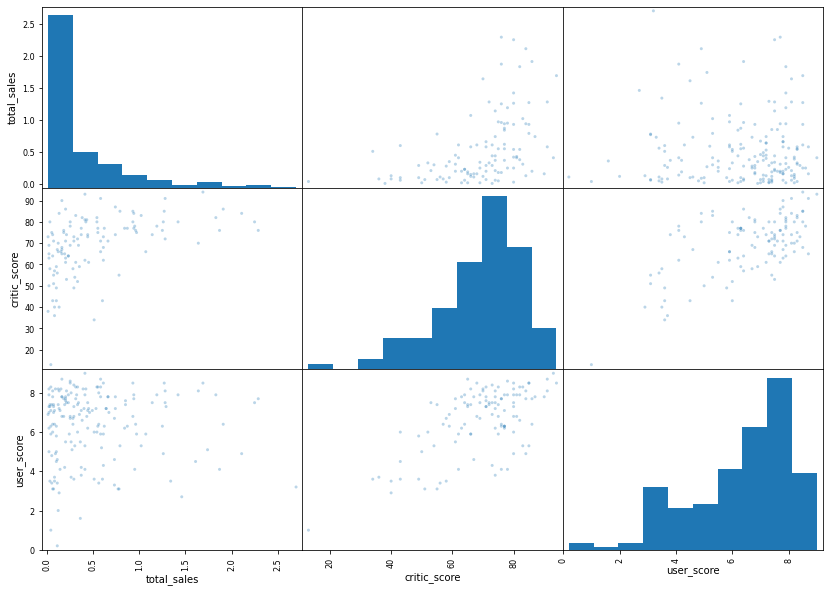

In [23]:
ps3 = games_relevant.loc[games_relevant['platform'] == 'PS3']
ps3 = ps3.loc[ps3['total_sales'] < 3]
ps3 = ps3[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(ps3, figsize=(14,10), alpha=0.3)
plt.show()

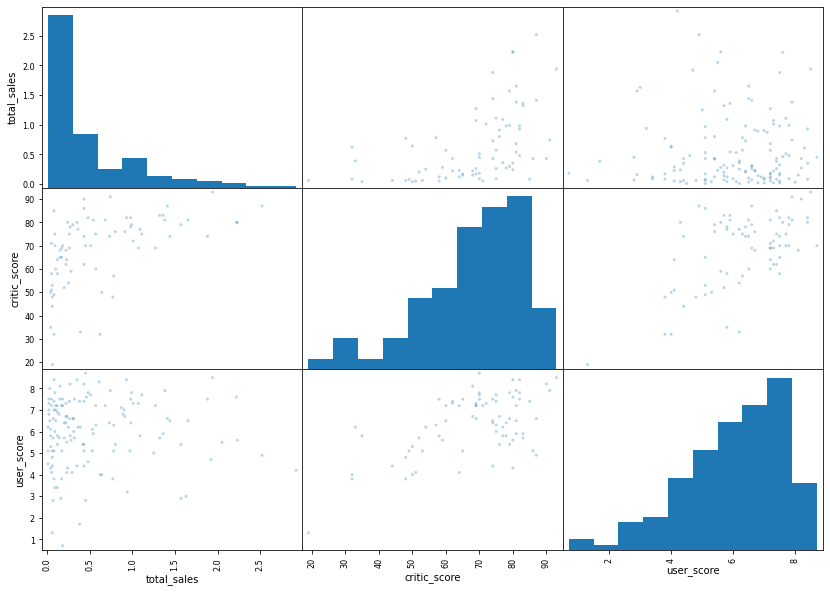

In [24]:
x360 = games_relevant.loc[games_relevant['platform'] == 'X360']
x360 = x360.loc[x360['total_sales'] < 3]
x360 = x360[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(x360, figsize=(14,10), alpha=0.3)
plt.show()

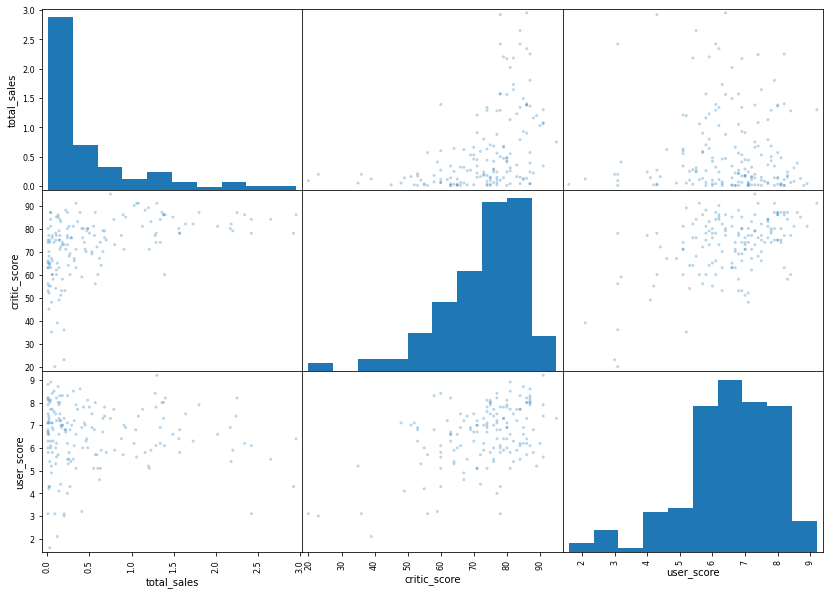

In [25]:
xone = games_relevant.loc[games_relevant['platform'] == 'XOne']
xone = xone.loc[xone['total_sales'] < 3]
xone = xone[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(xone, figsize=(14,10), alpha=0.3)
plt.show()

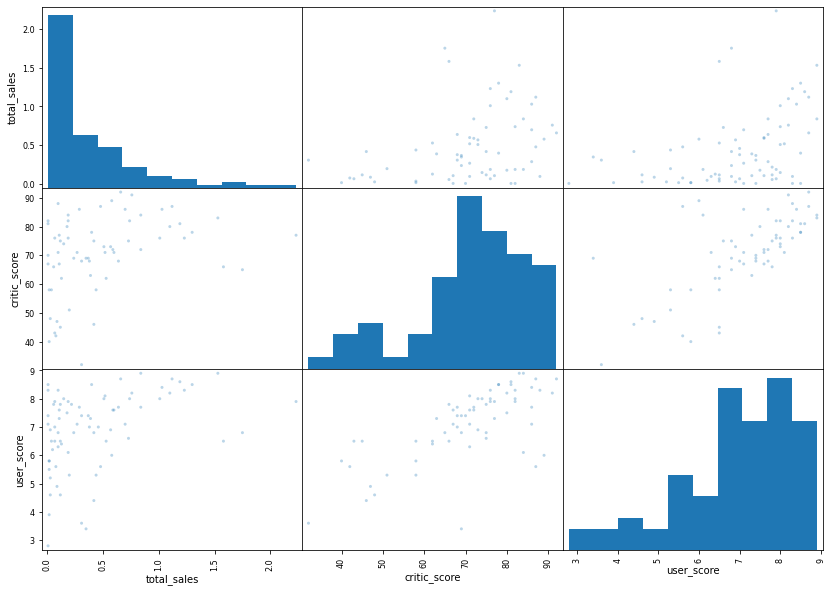

In [26]:
wiiu = games_relevant.loc[games_relevant['platform'] == 'WiiU']
wiiu = wiiu.loc[wiiu['total_sales'] < 3]
wiiu = wiiu[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(wiiu, figsize=(14,10), alpha=0.3)
plt.show()

<div style="border:solid green 2px; padding: 20px">
Изучим общее распределение игр по количеству и продажам в разбивке по жанрам.

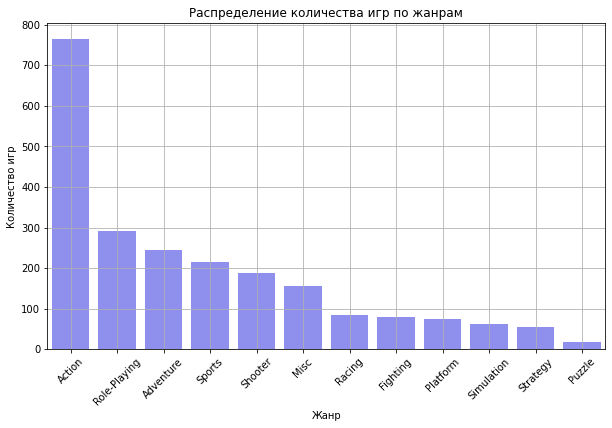

In [27]:
genre_grouped = games_relevant.groupby('genre')['total_sales'].agg(['count','median'])\
                                                     .sort_values(by='count', ascending=False)\
                                                     .reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_grouped['genre'], y=genre_grouped['count'], color='blue', alpha=0.5)
plt.xticks(rotation=45)
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.title('Распределение количества игр по жанрам')
plt.grid()
plt.show()

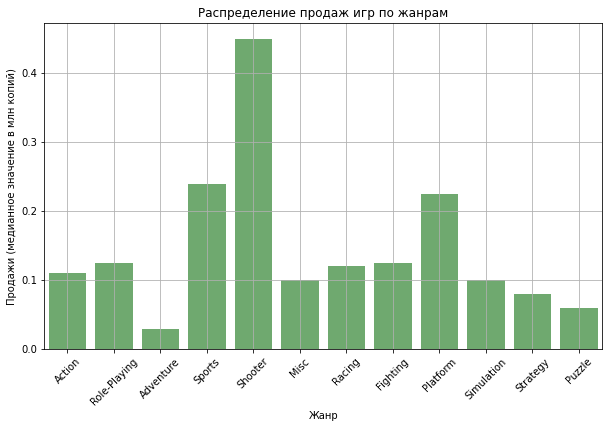

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=genre_grouped['genre'], y=genre_grouped['median'], color='green', alpha=0.6)
plt.xticks(rotation=45)
plt.xlabel('Жанр')
plt.ylabel('Продажи (медианное значение в млн копий)')
plt.title('Распределение продаж игр по жанрам')
plt.grid()
plt.show()

<div style="border:solid green 2px; padding: 20px">
Наиболее популярный жанр по количеству выпущенных игр — экшен. Их число превышает второй по значению жанр — РПГ — в 2,5 раза. По медианным продажам с большим отрывом лидируют шутеры, далее — спортивные игры и платформеры. </div>

### Портрет пользователя по регионам

<div style="border:solid green 2px; padding: 20px">
Изучим предпочтения пользователей в основных регионах — Северная Америка, Европа, Япония. Определим пять самых популярных платформ и жанров. Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [29]:
sales_grouped = games_relevant.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()\
                                                    .sort_values(by='na_sales', ascending=False)
sales_grouped = sales_grouped.reset_index()
sales_grouped

,platform,na_sales,eu_sales,jp_sales
0,PS4,108.74,141.09,15.96
1,XOne,93.12,51.59,0.34
2,X360,81.66,42.52,0.51
3,PS3,63.50,67.81,23.35
4,3DS,38.20,30.96,67.81
5,WiiU,29.21,19.85,10.88
6,PC,11.11,25.36,0.00
7,Wii,6.56,5.93,0.05
8,PSV,5.04,6.10,18.59
9,DS,0.57,0.85,0.00


<div style="border:solid green 2px; padding: 20px">
Построим график распределения продаж по платформам и регионам.

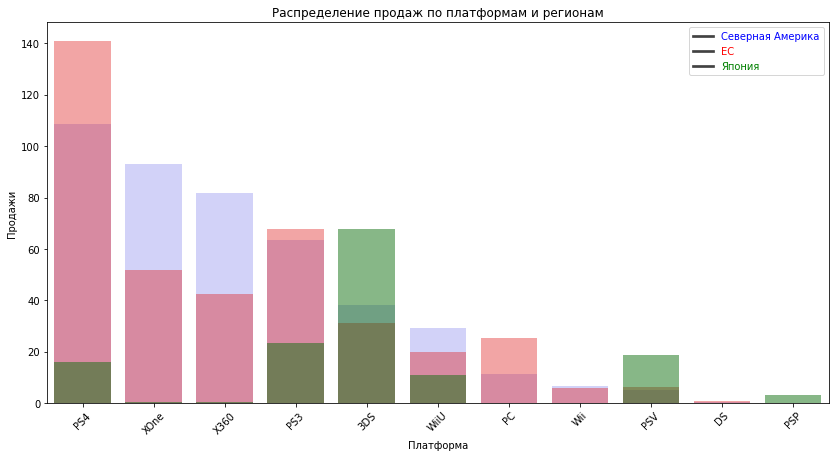

In [30]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=45)
plt.title('Распределение продаж по платформам и регионам')
sns.barplot(x=sales_grouped['platform'], y=sales_grouped['na_sales'], color='blue', alpha=0.2)
sns.barplot(x=sales_grouped['platform'], y=sales_grouped['eu_sales'], color='red', alpha=0.4)
sns.barplot(x=sales_grouped['platform'], y=sales_grouped['jp_sales'], color='green', alpha=0.5)
plt.legend(labels=['Северная Америка', 'ЕС', 'Япония'], labelcolor=['blue', 'red', 'green'])
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()

<div style="border:solid green 2px; padding: 20px">
Также посчитаем распределение по продажам в долях.

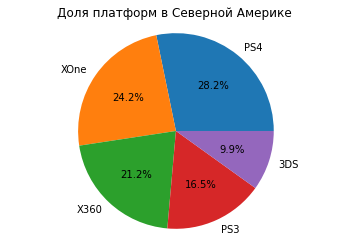

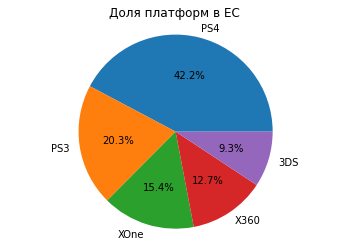

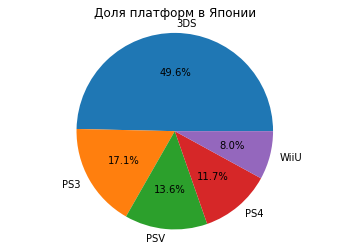

In [31]:
norm_list = ['Доля платформ в Северной Америке', 'Доля платформ в ЕС', 'Доля платформ в Японии']
sales_list = ['na_sales', 'eu_sales', 'jp_sales']

for i, j in zip(norm_list, sales_list):
    top_5_sales = sales_grouped.set_index('platform')
    top_5_sales = top_5_sales.sort_values(by=j, ascending=False)
    top_5_sales = top_5_sales[0:5]
    fig, ax = plt.subplots()
    ax.pie(top_5_sales[j], labels=top_5_sales.index, autopct='%1.1f%%')
    ax.axis("equal")
    plt.title(i)
    plt.show()

<div style="border:solid green 2px; padding: 20px">
Пять самых популярных платформ для Северной Америки в сумме за последние несколько лет — PS4 (доля - 28%), XOne (24%), X360 (21%), PS3 (17%), 3DS (10%).
    
Для Европы — PS4 (42%), PS3 (20%), XOne (15%), X360 (13%), 3DS (9%).

Для Японии — 3DS (50%), PS3 (17%), PSV (14%), PS4 (12%), WiiU (8%).

In [32]:
genres_grouped = games_relevant.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()\
                                                    .sort_values(by='na_sales', ascending=False)
genres_grouped = genres_grouped.reset_index()
genres_grouped

,genre,na_sales,eu_sales,jp_sales
0,Action,126.05,118.13,40.49
1,Shooter,109.74,87.86,6.61
2,Sports,65.27,60.52,5.41
3,Role-Playing,46.40,36.97,51.04
4,Misc,27.49,20.04,9.20
5,Platform,18.14,15.58,4.79
6,Fighting,15.55,8.55,7.65
7,Racing,12.96,20.19,2.30
8,Adventure,7.14,8.25,5.82
9,Simulation,4.86,10.92,4.52


<div style="border:solid green 2px; padding: 20px">
Распределение продаж по жанрам и регионам.

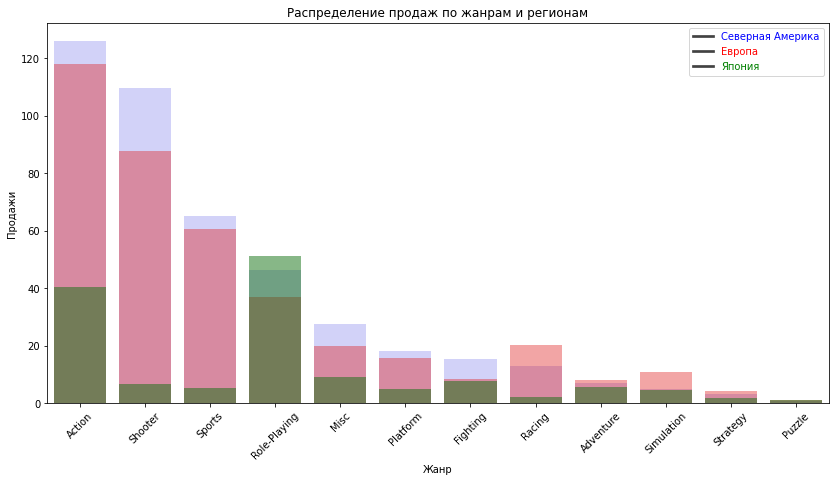

In [33]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=45)
plt.title('Распределение продаж по жанрам и регионам')
sns.barplot(x=genres_grouped['genre'], y=genres_grouped['na_sales'], color='blue', alpha=0.2)
sns.barplot(x=genres_grouped['genre'], y=genres_grouped['eu_sales'], color='red', alpha=0.4)
sns.barplot(x=genres_grouped['genre'], y=genres_grouped['jp_sales'], color='green', alpha=0.5)
plt.legend(labels=['Северная Америка', 'Европа', 'Япония'], labelcolor=['blue', 'red', 'green'])
plt.ylabel('Продажи')
plt.xlabel('Жанр')
plt.show()

<div style="border:solid green 2px; padding: 20px">
Самые попуярные жанры игр в Северной Америке, если не считать обобщающую категорию 'misc', — экшены, шутеры, спортивные игры, РПГ, платформеры.

В Европе почти так же — экшены, шутеры, спортивные игры, РПГ, гонки.

В Японии — РПГ, экшены, файтинги, шутеры, приключения.

<div style="border:solid green 2px; padding: 20px">
Определим долю регионов на рынке игр.

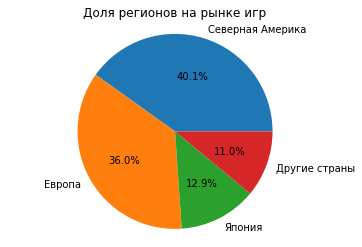

In [34]:
market_depth_by_region = games_relevant[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
market_values = []

for i in market_depth_by_region.columns:
    market_values.append(market_depth_by_region[i].sum().round(2))
    
fig, ax = plt.subplots()
ax.pie(market_values, labels=['Северная Америка', 'Европа', 'Япония', 'Другие страны'], autopct='%1.1f%%')
ax.axis("equal")
plt.title('Доля регионов на рынке игр')
plt.show()

<div style="border:solid green 2px; padding: 20px">
Объем рынков: Северная Америка — 40%, Европа — 36%, Япония — 13%, другие страны — 11%.

<div style="border:solid green 2px; padding: 20px">
Изучим влияние рейтинга ESRB на продажи игр в разбивке по регионам. Для этого рассмотрим четыре наиболее крупные категории рейтинга.

In [35]:
games_relevant['rating'].fillna('Без рейтинга', inplace=True)
rating = games_relevant.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
rating

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59
Без рейтинга,89.42,78.91,85.05


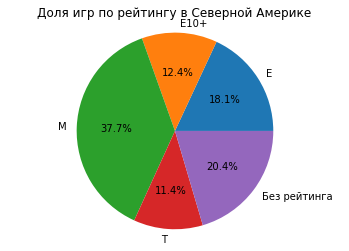

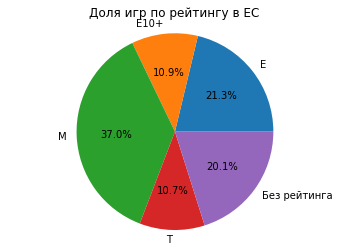

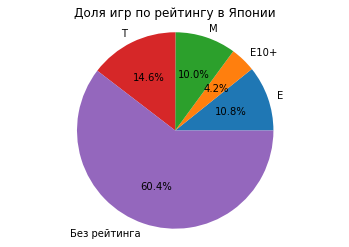

In [36]:
norm_list = ['Доля игр по рейтингу в Северной Америке', 'Доля игр по рейтингу в ЕС', 'Доля игр по рейтингу в Японии']
sales_list = ['na_sales', 'eu_sales', 'jp_sales']

for i, j in zip(norm_list, sales_list):
    fig, ax = plt.subplots()
    ax.pie(rating[j], labels=rating.index, autopct='%1.1f%%')
    ax.axis("equal")
    plt.title(i)
    plt.show()

<div style="border:solid green 2px; padding: 20px">
Доля жанров в Америке и Европе схожа: игры для пользователей от 17 лет (М) — самые популярные (доля — около 37%), игры для детей от 6 лет (Е) — 18-21%, игры для детей от 10 лет (Е10+) — 11-12%, игры для подростков от 13 лет (Т) — 10-11%. Остальные игры без рейтинга.

В Японии распределение немного другое. На первом месте игры для подростков (около 15%), затем — для детей от 6 лет (11%), для возраста 17+ — 10%, для 10+ — 4%. Остальные игры без рейтинга.

Можно сделать вывод, что в Японии спрос на более жестокие игры ниже, если опираться на рейтинг от ESRB.

Однако стоит учитывать, что в Японии более 60% игр вовсе не имеют рейтинга ESRB. Возможно, это связано с тем, что это американская фирма, а Япония впоне самобытная страна в плане разработки платформ и игр. Таким образом, рейтинг ESRB в минимальной степени влияет на выбор игр японскими пользователями.

### Гипотезы

<div style="border:solid green 2px; padding: 20px">
Нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC равны".

Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC не равны".
    
Критический уровень статистической значимости зададим на уровне 5%.

In [37]:
x_one = games_relevant.loc[games_relevant['platform'] == 'XOne']
pc = games_relevant.loc[games_relevant['platform'] == 'PC']

alpha = 0.05

results = st.ttest_ind(x_one['user_score'].dropna(), pc['user_score'].dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid green 2px; padding: 20px">
Следовательно средние пользовательские рейтинги платформ Xbox One и PC различаются.

<div style="border:solid green 2px; padding: 20px">

Нулевая гипотеза: "Средние пользовательские рейтинги жанров экшен и спорт равны".

Альтернативная гипотеза: "Средние пользовательские рейтинги жанров экшен и спорт не равны".

Критический уровень статистической значимости зададим на уровне 5%.

In [38]:
action = games_relevant.loc[games_relevant['genre'] == 'Action']
sports = games_relevant.loc[games_relevant['genre'] == 'Sports']

alpha = 0.05

results = st.ttest_ind(action['user_score'].dropna(), sports['user_score'].dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


<div style="border:solid green 2px; padding: 20px">
Cредние пользовательские рейтинги жанров экшен и спорт имеют статистически значимые различия.

## Выводы

Для составления прогноза рынка видеоигр на 2017-й год мы провели исследовательский анализ исторических данных (1980-2016 годы) по продажам игр.

Изучив информацию об уровне продаж в Северной Америке, Европе, Японии и других странах, а также об оценках и рейтингах игр, сделали следующие выводы:
- Пик количества выпускаемых игр на разных платфрмах пришелся на 2010-2011 годы. В 2015-2016 годах выходит около 600 игр.
- В топ-20 самых продаваемых игр входят 7 игр для консоли Wii, причем три из них — в пятерке лучших. Это можно объяснить инновационностью платформы для своего времени, однако к настоящему времени, судя по продажам, она уже неактуальна. 
- Топ самых успешных платформ в истории выглядит так: PS2 — 1255.77 млн проданных копий игр, X360 — 971.42 млн, PS3 — 939.65 млн, Wii — 907.51 млн, DS — 806.12 млн, PS — 730.86 млн, GBA — 317.85 млн, PS4 — 314.14 млн, PSP — 294.05 млн, PC — 259.52 млн.
- Однако только на эти цифры ориетироваться нельзя, т.к. у каждой платформы есть период "активной жизни". Изучив графики, мы поняли, что средний период "жизни" платформы - от 3 до 5 лет. <b>В текущем периоде наиболее перспективной представляется PS4</b>, т.к. у нее восходящий тренд продаж. Также можно рассматривать игры для PC.
- В целом, отзывы критиков и пользователей не влияют на уровень продаж игр — корреляции между этими показателями практически нет.
- <b>Наиболее популярный жанр по количеству выпущенных игр — экшен</b>. Их число превышает второй по значению жанр — РПГ — в 2,5 раза. <b>По медианным продажам с большим отрывом лидируют шутеры</b>, далее — спортивные игры и платформеры.
- В разбивке по регионам топ плафторм выглядит следующим образом: Северная Америка — PS4 (доля - 28%), XOne (24%), X360 (21%), PS3 (17%), 3DS (10%). Европа — PS4 (42%), PS3 (20%), XOne (15%), X360 (13%), 3DS (9%). Япония — 3DS (50%), PS3 (17%), PSV (14%), PS4 (12%), WiiU (8%). Но следует учитывать, что активный период платформы 3DS уже, по сути, прошел.
- <b>Распределение по жанрам такое</b>: Северная Америка и Европа — экшены, шутеры, спортивные игры, РПГ. Япония — РПГ, экшены, файтинги, шутеры.
- <b>Доля регионов по объему рынка</b>: Северная Америка — 40%, Европа — 36%, Япония — 13%, другие страны — 11%.
- <b>Доля игр в разбивке по рейтингу ESRB и регионам</b>:
    - Америка и Европа: игры для пользователей от 17 лет (М) — самые популярные (доля — около 37%), игры для детей от 6 лет (Е) — 18-21%, игры для детей от 10 лет (Е10+) — 11-12%, игры для подростков от 13 лет (Т) — 10-11%. Осальные — без рейтинга.
    - Япония: на первом месте игры для подростков (15%), затем — для детей от 6 лет (11%), для возраста 17+ — 10%, для 10+ — 4%. Если опираться на рейтинг от ESRB, можно сделать вывод, что в Японии спрос на более жестокие игры ниже. Однако стоит учитывать, что в этой стране более 60% игр вовсе не имеют рейтинга ESRB. Возможно, это связано с тем, что это американская фирма, а Япония вполне самобытная страна в плане разработки платформ и игр. Таким образом, рейтинг ESRB в минимальной степени влияет на выбор игр японскими пользователями.

### Рекомендации

- Рекламную кампанию стоит сфокусировать на платформе PS4 и частично на PC.
- По продажам в неоспоримых лидерах — шутеры.
- Фокус стоит делать на Северной Америке — там самый объемный рынок видеоигр. Затем — Европа, затем — Япония.
- В Америке и Европе стоит больше рекламировать игры в рейтинге 17+ (М), в Японии — 13+ (Т) (если руководствоваться рейтингом ESRB).